In [1]:
# Load necessary packages and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Load dataset
df = pd.read_csv(r'house_price.csv')
df.head()

,Id,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,...,Heating,Electrical,Foundation,Exterior1st,Exterior2nd,RoofStyle,SaleCondition,MoSold,YrSold,SalePrice
0,1,Richmond,Duplex,4.0,5.0,1938,2007,1418.542110,1334.672273,2.0,...,Electric,Mix,BrkTil,Wood,Wood,Cedar,Normal,4.0,2024.0,165523.670390
1,2,Delta,Duplex,7.0,1.0,1919,-9223372036854775808,570.622787,844.691015,1.0,...,HeatPump,FuseF,BrkTil,Vinyl,Vinyl,Cedar,Abnorml,NaN,2021.0,165344.625514
2,3,Burnaby,BasementSuite,4.0,6.0,1981,1970,816.080798,2030.685080,1.0,...,Radiant,FuseA,CBlock,Stucco,Stucco,Asphalt,Abnorml,6.0,2022.0,262609.986627
3,4,Surrey,BasementSuite,5.0,5.0,1932,-9223372036854775808,589.704590,625.410833,2.0,...,Radiant,SBrkr,PConc,Vinyl,Vinyl,TorchOn,Partial,4.0,2021.0,134246.920554
4,5,Surrey,Detached,6.0,NaN,1957,1994,1052.067733,1427.795371,3.0,...,Gas,FuseA,Stone,Stucco,Stucco,Asphalt,Normal,9.0,2020.0,167186.521789


In [2]:
df = df.ffill()

In [3]:
# Remove outliers using IQR method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Create masks for lower and upper bounds, applying only to numeric columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter only numeric columns to avoid alignment issues
numeric_columns = df.select_dtypes(include=['number']).columns
mask = ~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)

# Apply the mask to the original dataframe
df_clean = df[mask]
df_clean.reset_index(drop=True, inplace=True)
df_clean.describe()

,Id,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,LotFrontage,LotArea,MasVnrArea,MoSold,YrSold,SalePrice
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.00000,2130.000000,2130.000000,2130.000000,2130.0,2129.000000,...,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,2508.384507,5.950235,4.961972,1969.604225,1989.79108,1052.314281,1483.950674,1.995305,1.0,2.996712,...,5.904695,1.089202,1.961502,493.117808,70.695587,10046.518273,110.822811,5.992019,2020.976526,181638.614996
std,1461.476349,1.534437,1.487685,29.481979,24.20701,338.795672,477.336525,1.032573,0.0,0.985081,...,1.884357,0.889649,1.031865,199.090706,23.790041,2867.275097,85.081592,2.804317,1.534147,48427.665221
min,1.000000,2.000000,1.000000,1887.000000,1921.00000,114.338365,400.000000,0.000000,1.0,1.000000,...,2.000000,0.000000,0.000000,0.000000,20.000000,2086.397810,0.000000,1.000000,2017.000000,48403.452665
25%,1210.250000,5.000000,4.000000,1948.000000,1973.00000,809.638555,1156.028381,1.000000,1.0,2.000000,...,5.000000,0.000000,1.000000,354.331270,53.324244,8070.839675,35.715898,4.000000,2020.000000,148694.962679
50%,2529.500000,6.000000,5.000000,1970.000000,1990.00000,1062.676026,1488.888716,2.000000,1.0,3.000000,...,6.000000,1.000000,2.000000,491.148432,69.981067,10101.079780,104.549096,6.000000,2021.000000,182014.067677
75%,3786.750000,7.000000,6.000000,1991.000000,2006.00000,1286.444133,1809.571293,3.000000,1.0,4.000000,...,7.000000,2.000000,3.000000,633.370422,87.118281,12039.373913,171.827963,8.000000,2022.000000,215321.790365
max,4996.000000,10.000000,9.000000,2052.000000,2056.00000,1979.854922,2821.167255,4.000000,1.0,5.000000,...,10.000000,3.000000,4.000000,1032.767709,136.684541,17957.572944,374.056412,12.000000,2024.000000,315785.745471


In [4]:
# Apply different normalization methods on numerical features
num_cols = df_clean.select_dtypes(include=np.number).columns

scalers = {
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

scaled_dfs = {}

for key, scaler in scalers.items():
    scaled = scaler.fit_transform(df_clean[num_cols])
    scaled_dfs[key] = pd.DataFrame(scaled, columns=num_cols)

scaled_dfs['MinMax'].head()

,Id,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,LotFrontage,LotArea,MasVnrArea,MoSold,YrSold,SalePrice
0,0.000000,0.250,0.500,0.309091,0.637037,0.699111,0.386042,0.50,0.0,NaN,...,0.750,0.333333,0.00,0.628069,0.330024,0.450320,0.705080,0.272727,1.000000,0.438025
1,0.001602,0.500,0.750,0.315152,0.614815,0.435553,0.287894,0.75,0.0,0.75,...,0.625,0.333333,0.75,0.262015,0.537644,0.180899,0.341643,0.727273,0.571429,0.392666
2,0.002803,0.625,0.625,0.569697,0.637037,0.458590,0.502150,0.25,0.0,0.50,...,0.375,0.000000,0.50,0.262101,0.515008,0.325429,0.480003,0.272727,0.571429,0.568681
3,0.003604,0.625,0.375,0.333333,0.607407,0.767247,0.406744,0.25,0.0,0.75,...,0.375,0.666667,0.75,0.707770,0.297400,0.659115,0.510892,0.727273,0.285714,0.326370
4,0.004004,0.375,0.750,0.381818,0.681481,0.767840,0.650616,0.75,0.0,0.50,...,0.125,0.666667,0.25,0.793036,0.410814,0.550360,0.135460,0.000000,0.285714,0.665601


In [5]:
features = ["GrLivArea", "TotalBsmtSF", "GarageArea"]

# Original
original = df_clean[features]

# Scaled versions
scaled_minmax = scaled_dfs["MinMax"][features]
scaled_standard = scaled_dfs["Standard"][features]
scaled_robust = scaled_dfs["Robust"][features]

# Compare original vs scaled
print("Original:\n", original.head())
print("\nMinMax Scaled:\n", scaled_minmax.head())
print("\nStandard Scaled:\n", scaled_standard.head())
print("\nRobust Scaled:\n", scaled_robust.head())

Original:
      GrLivArea  TotalBsmtSF  GarageArea
0  1334.672273  1418.542110  648.649778
1  1097.039170   926.869134  270.600378
2  1615.788801   969.845775  270.688940
3  1384.794805  1545.649834  730.962139
4  1975.249072  1546.755927  819.021656

MinMax Scaled:
    GrLivArea  TotalBsmtSF  GarageArea
0   0.386042     0.699111    0.628069
1   0.287894     0.435553    0.262015
2   0.502150     0.458590    0.262101
3   0.406744     0.767247    0.707770
4   0.650616     0.767840    0.793036

Standard Scaled:
    GrLivArea  TotalBsmtSF  GarageArea
0  -0.312805     1.081223    0.781395
1  -0.810754    -0.370355   -1.117931
2   0.276260    -0.243474   -1.117486
3  -0.207776     1.456487    1.194934
4   1.029491     1.459752    1.637346

Robust Scaled:
    GrLivArea  TotalBsmtSF  GarageArea
0  -0.235970     0.746355    0.564442
1  -0.599577    -0.284827   -0.790384
2   0.194173    -0.194692   -0.790067
3  -0.159276     1.012937    0.859427
4   0.744190     1.015256    1.175008


/tmp/ipykernel_26195/505514592.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_filled = X_encoded.fillna(method='ffill').fillna(method='bfill').fillna(0)


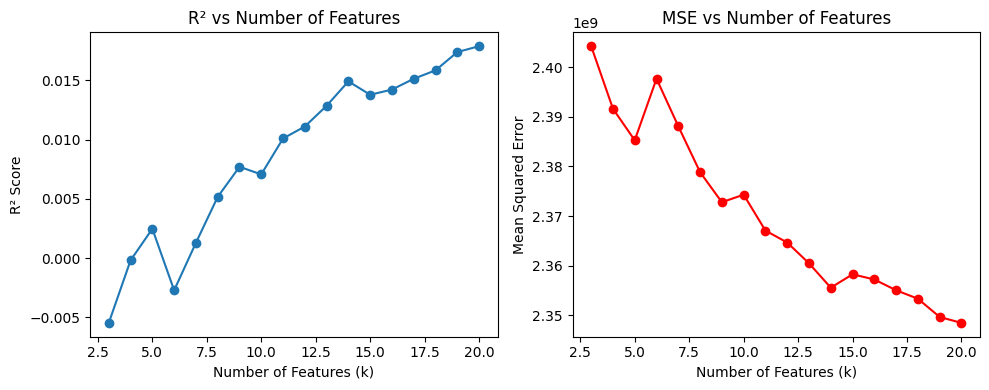

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare data
df_clean = df_clean.drop(columns=['Id'])
X = df_clean.drop(columns=['SalePrice'])
y = df_clean['SalePrice']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Fill missing values
X_filled = X_encoded.fillna(method='ffill').fillna(method='bfill').fillna(0)

# Try different values for k
r2_scores = []
mse_scores = []
k_values = list(range(3, 21))

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X_filled, y)

    # Optional: apply a scaler (StandardScaler used here)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2_scores.append(r2)
    mse_scores.append(mse)

# Plot the performance
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_values, r2_scores, marker='o')
plt.title("R² vs Number of Features")
plt.xlabel("Number of Features (k)")
plt.ylabel("R² Score")

plt.subplot(1, 2, 2)
plt.plot(k_values, mse_scores, marker='o', color='red')
plt.title("MSE vs Number of Features")
plt.xlabel("Number of Features (k)")
plt.ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()
